# Turnover Analysis

Analysing the turnover of players, from 1990 to 2017. Need to drop all 2017-18 values in the players table as they are all NULL for teams.  

Add these columns to players table:  
 - Draft Position  
 - Draft Team  
 - Team PlayoffFinalResult  
 - Career (50 GP over year thing)  
 

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
# load players
players= pd.read_excel("NHLPlayerData1967_2018.xlsx", sheet_name="Player Data")
# drop final year and all years prior to '90
players['Year'] = players.apply(lambda row: int(row['Season'][0:4]) + 1, axis=1)
players['Name'] = players.apply(lambda row: row['First Name'] + " " + row['Last Name'], axis=1)
players = players[players['Team'].notna()]
players = players[players['Year'] >= 1990]
print(players.head(15))

     Last Name First Name   Season   Age Team Pos  GP   G   A  PTS  ...  \
0        Aalto      Antti  1997-98  22.0  MDA   C   3   0   0    0  ...   
1        Aalto      Antti  1998-99  23.0  MDA   C  73   3   5    8  ...   
2        Aalto      Antti  1999-00  24.0  MDA   C  63   7  11   18  ...   
3        Aalto      Antti  2000-01  25.0  MDA   C  12   1   1    2  ...   
4       Abbott    Spencer  2013-14  25.0  TOR  RW   1   0   0    0  ...   
5       Abbott    Spencer  2016-17  28.0  CHI  LW   1   0   0    0  ...   
6   Abdelkader     Justin  2007-08  20.0  DET  LW   2   0   0    0  ...   
7   Abdelkader     Justin  2008-09  21.0  DET  LW   2   0   0    0  ...   
8   Abdelkader     Justin  2009-10  22.0  DET  LW  50   3   3    6  ...   
9   Abdelkader     Justin  2010-11  23.0  DET  LW  74   7  12   19  ...   
10  Abdelkader     Justin  2011-12  24.0  DET  LW  81   8  14   22  ...   
11  Abdelkader     Justin  2012-13  25.0  DET  LW  48  10   3   13  ...   
12  Abdelkader     Justin

In [4]:
# load playoff data
playoffs = pd.read_csv("nhlplayoffs.csv")
print(playoffs.head())

   Year   Lg             Champion             Runner-Up    Conn Smythe
0  2020  NHL  Tampa Bay Lightning          Dallas Stars  Victor Hedman
1  2019  NHL      St. Louis Blues         Boston Bruins  Ryan O'Reilly
2  2018  NHL  Washington Capitals  Vegas Golden Knights  Alex Ovechkin
3  2017  NHL  Pittsburgh Penguins   Nashville Predators  Sidney Crosby
4  2016  NHL  Pittsburgh Penguins       San Jose Sharks  Sidney Crosby


In [5]:
# load the drafts
drafts = {}
for f in os.listdir("drafts"):
    if f not in ['2018.csv']:
        drafts[f.split(".")[0]] = pd.read_csv("drafts\{}".format(f))
        
# this draft data has no bins for rounds. We will need to add this in bins of 30
# each year, we need to cut the rounds off based on how many teams there are - just divide the year by rounds
# 90, 91: 12. 92, 93, 94: 11. 95, 96, 97, 98, 99, 00, 01, 02, 03, 04: 9. 05-on: 7

# career - True or False - if player played more than 50 games, consider career = True. Otherwise False

bin_size = 30

for k, v in drafts.items():
    v['Bin'] = 0
    v['Career'] = False
    counter = 0
    new_bin = 1
    for row in v.itertuples():
        v.at[row[0], 'Bin'] = new_bin
        if v.at[row[0], 'GP'] > 50:
            v.at[row[0], 'Career'] = True
        counter += 1
        if counter == 30:
            # reset counter after passing 30 players and increase bin
            counter = 0
            new_bin += 1
            
# concatenate all the draft dataframes
for k, v in drafts.items():
    v['Year'] = k

    
df_drafts = pd.concat(list(drafts.values()), sort=False)

In [6]:
print(df_drafts.head())

   Overall                 Team         Player Nat. Pos   Age      To  \
0      1.0     Quebec Nordiques     Owen Nolan   GB  RW  18.0  2010.0   
1      2.0    Vancouver Canucks    Petr Nedved   CZ   C  18.0  2007.0   
2      3.0    Detroit Red Wings  Keith Primeau   CA   C  18.0  2006.0   
3      4.0  Philadelphia Flyers     Mike Ricci   CA   C  18.0  2007.0   
4      5.0  Pittsburgh Penguins   Jaromir Jagr   CZ  RW  18.0  2018.0   

           Amateur Team      GP      G  ...  GP.1   W   L  T/O  SV%  GAA  \
0        Cornwall (OHL)  1200.0  422.0  ...   NaN NaN NaN  NaN  NaN  NaN   
1         Seattle (WHL)   982.0  310.0  ...   NaN NaN NaN  NaN  NaN  NaN   
2   Niagara Falls (OHL)   909.0  266.0  ...   NaN NaN NaN  NaN  NaN  NaN   
3    Peterborough (OHL)  1099.0  243.0  ...   NaN NaN NaN  NaN  NaN  NaN   
4  Poldi Kladno (Czech)  1733.0  766.0  ...   NaN NaN NaN  NaN  NaN  NaN   

      PS  Bin  Career  Year  
0   91.6    1    True  1990  
1   65.1    1    True  1990  
2   63.4    1 

In [7]:
# dict of team name - acronym connections
teams = {'DAL': 'Dallas Stars',
         'FLA': 'Florida Panthers',
         'LAK': 'Los Angeles Kings',
         'PHX': 'Phoenix Coyotes',
         'WPG': 'Winnipeg Jets',
         'MIN': 'Minnesota Wild',
         'VAN': 'Vancouver Canucks',
         'CHI': 'Chicago Blackhawks',
         'WSH': 'Washington Capitals',
         'PIT': 'Pittsburgh Penguins',
         'ARI': 'Arizona Coyotes',
         'NJD': 'New Jersey Devils',
         'ANA': 'Anaheim Ducks',
         'EDM': 'Edmonton Oilers',
         'NSH': 'Nashville Predators',
         'CGY': 'Calgary Flames',
         'PHI': 'Philadelphia Flyers',
         'TBL': 'Tampa Bay Lightning',
         'SJS': 'San Jose Sharks',
         'BUF': 'Buffalo Sabres',
         'CBJ': 'Columbus Blue Jackets',
         'NYI': 'New York Islanders',
         'NYR': 'New York Rangers',
         'TOR': 'Toronto Maple Leafs',
         'CAR': 'Carolina Hurricanes',
         'STL': 'St. Louis Blues',
         'COL': 'Colorado Avalanche',
         'DET': 'Detroit Red Wings',
         'BOS': 'Boston Bruins',
         'OTT': 'Ottawa Senators',
         'MTL': 'Montreal Canadiens',
         'VGK': 'Vegas Golden Knights',
         'ATL': 'Atlanta Thrashers',
         'MDA': 'Mighty Ducks of Anaheim' # Anaheim Ducksa
        }

# dict of team name connections - for franchises that changed name or location
team_connect = {'PHX':'ARI',
                'MDA':'ANA',
                'ATL':'WPG',
                'MNS':'DAL', # minnesota north starts
                'HAR':'CAR',
                'QUE':'COL',
                'WIN':'ARI'
                }


In [8]:
# adding values to the players table:
# draftpos and team, finalresult, Career
players['Career'] = False
players['FinalResult'] = 0 # 0 for none, 1 for runnerup, 2 for winner
players['DraftTeam'] = ""
players['DraftTeamSame'] = False # so that if team changes names we can still know if same team
players['DraftPos'] = 0.0
for row in players.itertuples():
    pl_name = players.at[row[0], 'Name']
    pl_team = players.at[row[0], 'Team']
    pl_year = players.at[row[0], 'Year']
    
    # career can be extracted via draft. Likewise draft team and pos. Final Result comes from playoff table
    draft_row = df_drafts.loc[df_drafts['Player'] == pl_name].to_dict('r')

    playoff_row = playoffs.loc[playoffs['Year'] == pl_year].to_dict('r')
    if len(playoff_row) > 0:
        winner = playoff_row[0]['Champion']
        loser = playoff_row[0]['Runner-Up']
    else:
        winner = None
        loser = None

    if len(draft_row) > 0:
        draft_pos = draft_row[0]['Overall']
        draft_team = draft_row[0]['Team']
        draft_bin = draft_row[0]['Bin']
        if draft_row[0]['GP'] == draft_row[0]['GP']:
            if int(draft_row[0]['GP']) > 50:
                career = True
            else:
                career = False
        else:
            career = False
    else:
        draft_pos = 0.0
        draft_bin = 0
        draft_team = None
        
    
    draft_team_same = False # update if True
    draft_team_ac = "UND" # undrafted
    # team connections so we can make draft and playoff match this
    for k, v in teams.items():
        if draft_team == v:
            # ensure draft team is not part of old set of labels
            if k in list(team_connect.keys()):
                draft_team_ac = team_connect[k]
            else:
                draft_team_ac = k
                
        if winner is not None:
            if winner == v:
                if k in list(team_connect.keys()):
                    winner_ac = team_connect[k]
                else:
                    winner_ac = k
        
        if loser is not None:
            if loser == v:
                if k in list(team_connect.keys()):
                    loser_ac = team_connect[k]
                else:
                    loser_ac = k
        
        
    if pl_team == winner_ac:
        result = 2
    elif pl_team == loser_ac:
        result = 1
    else:
        result = 0
    
    if draft_team_ac != pl_team:
        if pl_team in list(team_connect.keys()):
            if team_connect[pl_team] == draft_team_ac:
                draft_team_same = True
    else:
        draft_team_same = True
        
    # update the row
    players.at[row[0], 'Career'] = career
    players.at[row[0], 'FinalResult'] = result
    players.at[row[0], 'DraftTeam'] = draft_team_ac
    players.at[row[0], 'DraftTeamSame'] = draft_team_same
    players.at[row[0], 'DraftPos'] = draft_pos
    players.at[row[0], 'DraftBin'] = draft_bin



In [9]:
print(players.head(25))

     Last Name First Name   Season   Age Team Pos  GP   G   A  PTS  ...  SGVT  \
0        Aalto      Antti  1997-98  22.0  MDA   C   3   0   0    0  ...   0.0   
1        Aalto      Antti  1998-99  23.0  MDA   C  73   3   5    8  ...   0.0   
2        Aalto      Antti  1999-00  24.0  MDA   C  63   7  11   18  ...   0.0   
3        Aalto      Antti  2000-01  25.0  MDA   C  12   1   1    2  ...   0.0   
4       Abbott    Spencer  2013-14  25.0  TOR  RW   1   0   0    0  ...   0.0   
5       Abbott    Spencer  2016-17  28.0  CHI  LW   1   0   0    0  ...   NaN   
6   Abdelkader     Justin  2007-08  20.0  DET  LW   2   0   0    0  ...   0.0   
7   Abdelkader     Justin  2008-09  21.0  DET  LW   2   0   0    0  ...   0.0   
8   Abdelkader     Justin  2009-10  22.0  DET  LW  50   3   3    6  ...   0.0   
9   Abdelkader     Justin  2010-11  23.0  DET  LW  74   7  12   19  ...   0.0   
10  Abdelkader     Justin  2011-12  24.0  DET  LW  81   8  14   22  ...   0.0   
11  Abdelkader     Justin  2

In [60]:
# analyzing turnovers: 
# 1 - how many times have players gone from one team to another each year
# 2 - what percentage of all players have switched teams 1+ times. what pct have switchted teams multiple times?
# 3 - for each draft bin, what pct of players are jumping team to team

year_counter = {} # dict with years as keys and counts of players moving as values
pl_count = 0 # count of all players listed, whether career or no
pl_career_count = 0 # count of all career players
pl_switch1_count = 0 # add 1 each time a player changes team once
pl_switch2_count = 0 # add 1 each time a player changes team again
pl_switch_count = 0 # all switches
dr_bin_count = {} # count of players per draft bin (0 - N)
dr_bin_switch_count = {} # count of players in draft bin switching teams at least once
dr_bin_career_count = {} # count of players in draft bin having a career
dr_bin_career_switch_count = {} # count of players in draft bin switching teams at least once, only career plrs
career_switch = 0 # add 1 every time a career player switches once


# local variables that will be held each row
current_player = None # to know if next player is different from last player
player_bin = None # the draft bin of the player
current_team = None # the team of the player at this row - compare prev to current to see if switch occurred
draft_team = None # keep this the same for a players run

# booleans that hold true for each player for the counters
# switched1 = False
# switched2 = False



for row in players.itertuples():
    # print(row)
    # print(row.Team, row.DraftTeam, row.DraftBin, row.Name)
    # break
    
    if row.Name != current_player:
        # new player
        current_player = row.Name
        player_bin = row.DraftBin
        current_team = row.Team
        draft_team = row.DraftTeam
        
        # reset boolean values
        switched1 = False
        switched2 = False
        
        # update global counters
        pl_count += 1
        if row.Career:
            pl_career_count += 1
            if player_bin in list(dr_bin_career_count.keys()):
                dr_bin_career_count[player_bin] += 1
            else:
                dr_bin_career_count[player_bin] = 1
            
        
        if player_bin in list(dr_bin_count.keys()):
            dr_bin_count[player_bin] += 1
        else:
            dr_bin_count[player_bin] = 1
        
        # if first row of player, we cannot update anything
        
    # else same player
    else:
        if row.Team != current_team:
            # switched - reset bools
            if not switched1:
                switched1 = True
                # update counter
                pl_switch_count += 1
                pl_switch1_count += 1
                # update bin switch counter
                if player_bin in list(dr_bin_switch_count.keys()):
                    dr_bin_switch_count[player_bin] += 1
                else:
                    dr_bin_switch_count[player_bin] = 1
                    
                # update our year counter
                if row.Year in list(year_counter.keys()):
                    year_counter[row.Year] += 1
                else:
                    year_counter[row.Year] = 1
                    
                # update career switch counter
                if row.Career:
                    career_switch += 1
                    if player_bin in list(dr_bin_career_switch_count.keys()):
                        dr_bin_career_switch_count[player_bin] += 1
                    else:
                        dr_bin_career_switch_count[player_bin] = 1
                    
                    
            elif switched1 and not switched2:
                switched2 = True
                # update counter - every time they switch subsequently
                pl_switch_count += 1
                pl_switch2_count += 1
                # update bin switch counter
                if player_bin in list(dr_bin_switch_count.keys()):
                    dr_bin_switch_count[player_bin] += 1
                else:
                    dr_bin_switch_count[player_bin] = 1        
    
                # update our year counter
                if row.Year in list(year_counter.keys()):
                    year_counter[row.Year] += 1
                else:
                    year_counter[row.Year] = 1
                    
            elif switched1 and switched2:
                # update counter - every time they switch subsequently
                pl_switch_count += 1
                # update bin switch counter
                if player_bin in list(dr_bin_switch_count.keys()):
                    dr_bin_switch_count[player_bin] += 1
                else:
                    dr_bin_switch_count[player_bin] = 1        
    
                # update our year counter
                if row.Year in list(year_counter.keys()):
                    year_counter[row.Year] += 1
                else:
                    year_counter[row.Year] = 1                

                    
# sort the years by key
year_counter = sorted(year_counter.items(), key = lambda x: x[0])
dr_bin_count = sorted(dr_bin_count.items(), key = lambda x: x[0])
dr_bin_switch_count = sorted(dr_bin_switch_count.items(), key = lambda x: x[0])

dr_bin_career_count = sorted(dr_bin_career_count.items(), key = lambda x: x[0])
dr_bin_career_switch_count = sorted(dr_bin_career_switch_count.items(), key = lambda x: x[0])

print(year_counter)
print(pl_count)
print(pl_career_count)
print(pl_switch1_count)
print(pl_switch2_count)
print(dr_bin_count)
print(dr_bin_switch_count)

print(career_switch)
print(dr_bin_career_count)
print(dr_bin_career_switch_count)
    

[(1990, 1), (1991, 158), (1992, 304), (1993, 348), (1994, 440), (1995, 420), (1996, 438), (1997, 436), (1998, 440), (1999, 496), (2000, 491), (2001, 505), (2002, 496), (2003, 510), (2004, 499), (2006, 454), (2007, 447), (2008, 410), (2009, 415), (2010, 436), (2011, 433), (2012, 470), (2013, 418), (2014, 424), (2015, 398), (2016, 399), (2017, 372)]
4005
2703
2376
1870
[(0.0, 2102), (1.0, 478), (2.0, 331), (3.0, 266), (4.0, 192), (5.0, 158), (6.0, 145), (7.0, 114), (8.0, 110), (9.0, 78), (10.0, 31)]
[(0.0, 4868), (1.0, 2269), (2.0, 971), (3.0, 762), (4.0, 494), (5.0, 434), (6.0, 445), (7.0, 274), (8.0, 301), (9.0, 174), (10.0, 66)]
1806
[(0.0, 1409), (1.0, 409), (2.0, 216), (3.0, 168), (4.0, 124), (5.0, 101), (6.0, 97), (7.0, 61), (8.0, 64), (9.0, 36), (10.0, 18)]
[(0.0, 698), (1.0, 357), (2.0, 180), (3.0, 142), (4.0, 107), (5.0, 83), (6.0, 80), (7.0, 51), (8.0, 60), (9.0, 32), (10.0, 16)]


In [64]:
# (again) analyzing turnovers: 
# 1 - how many times have players gone from one team to another each year (year_counter)
# 2 - what percentage of all players have switched teams 1+ times. what pct have switchted teams multiple times?
# 3 - for each draft bin, what pct of players are jumping team to team
# 4 - percent of players vs switched per bin

# 1: drop the 1990 value from the year_counter as it has limited value
# 2: quick and easy calculations
# 3: pretty easy calculation also
# so start with 2/3 then graph 1

# 2:
print("Percentages of all players who: ")
print("Switched teams once -", pl_switch1_count / pl_count)
print("Switched teams more than once -", pl_switch2_count / pl_count )
print("\n")

# 3:
count_bin_switches = 0
for item in dr_bin_switch_count:
    count_bin_switches += item[1]

count_bin = 0
for item in dr_bin_count:
    count_bin += item[1]
    
pl_switch = []
    
print("Percentage of switches from each draft bin, percentage of players in each draft bin")
for i in range(len(dr_bin_switch_count)):
    item = dr_bin_switch_count[i]
    dc = dr_bin_count[i]
    print("Draft bin {}: {}, {}".format(item[0], round(item[1]/count_bin_switches,3), round(dc[1]/count_bin,3)))
    if item[0] == 0.0:
        #pl_switch.append((11.0, round(item[1]/count_bin_switches,3), round(dc[1]/count_bin,3)))
        pass
    else:
        pl_switch.append((item[0], round(item[1]/count_bin_switches,3), round(dc[1]/count_bin,3)))
        
pl_switch = sorted(pl_switch, key=lambda x: x[0])
print(pl_switch)

switch_count = []
print('\n')
print('Count of switches per player in draft bin')
for i in range(len(dr_bin_switch_count)):
    item = dr_bin_switch_count[i]
    dc = dr_bin_count[i]
    # print("Draft bin {}: {}".format(item[0], round(dc[1]/item[1],3)))
    print("Draft bin {}: {}".format(item[0], round(dc[1]/item[1],3)))
    if item[0] == 0.0:
        pass
    else:
        switch_count.append((item[0], round(dc[1]/item[1],3)))
        
print('\n')
print('Percentage of players with careers switching')
print('Total Players that switched at least once:', career_switch)
print('Total career players:', pl_career_count)

for i in range(len(dr_bin_career_switch_count)):
    k = dr_bin_career_switch_count[i][0]
    v = dr_bin_career_switch_count[i][1]
    v2 = dr_bin_career_count[i][1]
    print('Draft Bin {}:{}/{} = {}'.format(k, v, v2, round(v/v2,3)))

Percentages of all players who: 
Switched teams once - 0.5932584269662922
Switched teams more than once - 0.46691635455680397


Percentage of switches from each draft bin, percentage of players in each draft bin
Draft bin 0.0: 0.44, 0.525
Draft bin 1.0: 0.205, 0.119
Draft bin 2.0: 0.088, 0.083
Draft bin 3.0: 0.069, 0.066
Draft bin 4.0: 0.045, 0.048
Draft bin 5.0: 0.039, 0.039
Draft bin 6.0: 0.04, 0.036
Draft bin 7.0: 0.025, 0.028
Draft bin 8.0: 0.027, 0.027
Draft bin 9.0: 0.016, 0.019
Draft bin 10.0: 0.006, 0.008
[(1.0, 0.205, 0.119), (2.0, 0.088, 0.083), (3.0, 0.069, 0.066), (4.0, 0.045, 0.048), (5.0, 0.039, 0.039), (6.0, 0.04, 0.036), (7.0, 0.025, 0.028), (8.0, 0.027, 0.027), (9.0, 0.016, 0.019), (10.0, 0.006, 0.008)]


Count of switches per player in draft bin
Draft bin 0.0: 0.432
Draft bin 1.0: 0.211
Draft bin 2.0: 0.341
Draft bin 3.0: 0.349
Draft bin 4.0: 0.389
Draft bin 5.0: 0.364
Draft bin 6.0: 0.326
Draft bin 7.0: 0.416
Draft bin 8.0: 0.365
Draft bin 9.0: 0.448
Draft bin 10.0: 

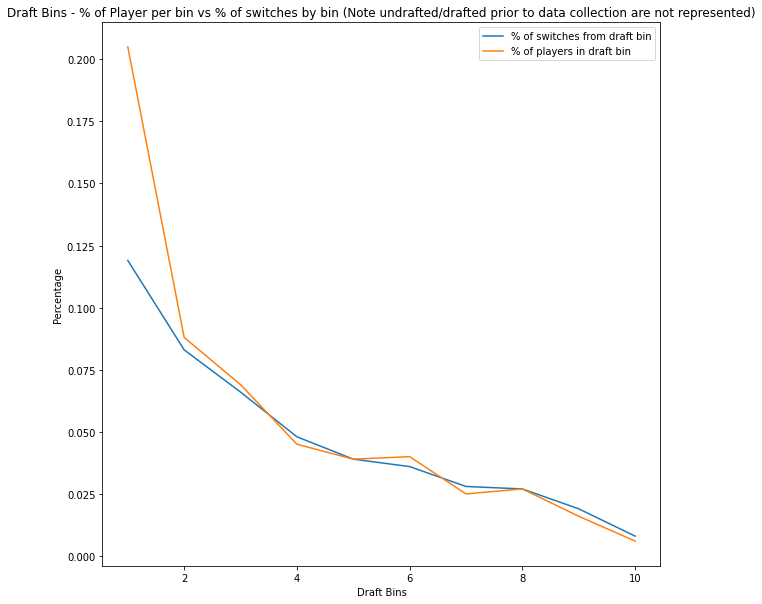

In [43]:
# plot the percentage of switches from each draft bin on top of pct of players in each draft bin
#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()  # set up the 2nd axis
#ax1.plot([x[2] for x in pl_switch]) #plot the Revenue on axis #1

# the next few lines plot the fiscal year data as bar plots and changes the color for each.
#ax2.plot([x[1] for x in pl_switch], color='orange')

#ax1.set_title('Percentage of Players in Bins vs Percentage of switches by players in bins')
#ax1.set_ylabel('Monthly Sales Revenue')
#ax2.set_ylabel('Number of Items Sold')

# Set the x-axis labels to be more meaningful than just some random dates.
#print([x[0] for x in pl_switch])
#labels = [x[0] for x in pl_switch]
#ax1.axes.set_xticklabels(labels)

# line 1 points
y1 = [x[2] for x in pl_switch]
x1 = [x[0] for x in pl_switch]
# plotting the line 1 points 
plt.plot(x1, y1, label = "% of switches from draft bin")
# line 2 points
y2 = [x[1] for x in pl_switch]
x2 = [x[0] for x in pl_switch]
# plotting the line 2 points 
plt.plot(x2, y2, label = "% of players in draft bin")
plt.xlabel('Draft Bins')
# Set the y axis label of the current axis.
plt.ylabel('Percentage')
# Set a title of the current axes.
plt.title('Draft Bins - % of Player per bin vs % of switches by bin (Note undrafted/drafted prior to data collection are not represented)')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

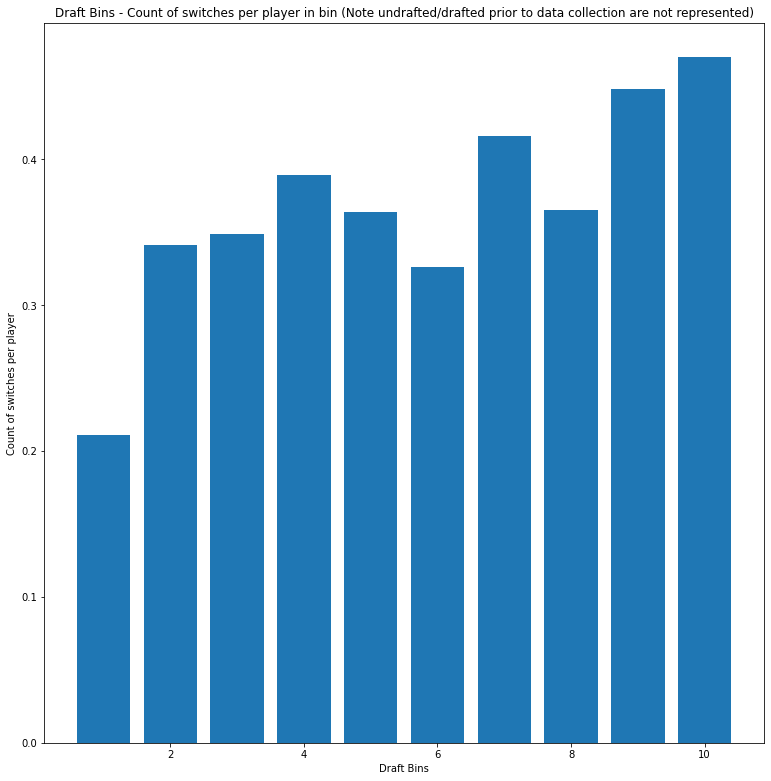

In [53]:
# count of player switches per bin
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bins = [x[0] for x in switch_count] 
pl_counts = [x[1] for x in switch_count]
ax.bar(bins,pl_counts)
plt.xlabel('Draft Bins')
plt.ylabel('Count of switches per player')
plt.title('Draft Bins - Count of switches per player in bin (Note undrafted/drafted prior to data collection are not represented)')
plt.show()

In [24]:
# 1 - players from one team to another (year_counter)
df_turnover = pd.DataFrame.from_records(year_counter, columns =['Year', 'Count'])
# drop 1990
df_turnover = df_turnover[df_turnover['Year'] > 1990]
print(df_turnover.head())

def zscore(s):
    return (s - np.mean(s)) / np.std(s)

# std deviation
print(zscore(df_turnover['Count']))
print(zscore(df_turnover['Count']).abs().gt(2))
#df_turnover.std()

   Year  Count
1  1991    158
2  1992    304
3  1993    348
4  1994    440
5  1995    420
1    -3.718962
2    -1.687421
3    -1.075175
4     0.204974
5    -0.073320
6     0.177144
7     0.149315
8     0.204974
9     0.984195
10    0.914622
11    1.109427
12    0.984195
13    1.179000
14    1.025939
15    0.399779
16    0.302376
17   -0.212466
18   -0.142893
19    0.149315
20    0.107571
21    0.622414
22   -0.101149
23   -0.017661
24   -0.379442
25   -0.365528
26   -0.741223
Name: Count, dtype: float64
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
Name: Count, dtype: bool


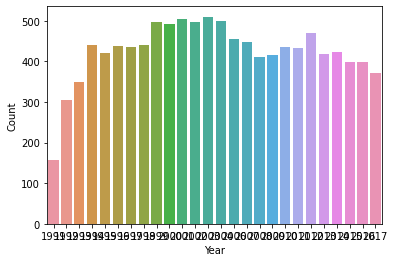

In [16]:
# graphit
ax = sns.barplot(x="Year", y="Count", data=df_turnover)